In [1]:
from sklearn.datasets import load_boston
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [2]:
X = data['data']
X_rm = X[:, 5]
Y = data['target']

In [3]:
import numpy as np
import random

## 1.Random with nothing

In [4]:
theta_0 = random.random() * 200 - 100
theta_1 = random.random() * 200 - 100

attempts = list(range(2000))


min_loss = float('inf')

count = 0
for _ in attempts:
    theta_0 = random.random() * 200 - 100
    theta_1 = random.random() * 200 - 100
    y_hat = X_rm * theta_1 + theta_0
    current_loss = np.sum(np.square(Y - y_hat)) / len(Y)
    if min_loss > current_loss:
        count += 1
        min_loss = current_loss
        best_theta_1, best_theta_0 = theta_1, theta_0
print(f"Sequence {count}: with loss {min_loss} when theta_1 = {best_theta_1}, theta_0 = {best_theta_0}")

Sequence 8: with loss 45.82494896933248 when theta_1 = 9.656592831433926, theta_0 = -36.715586255676655


-5.84492039500735 43.5129292863584


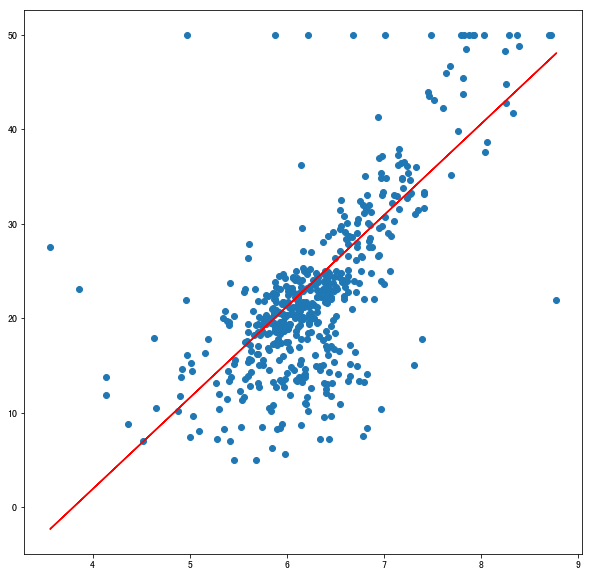

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
best_y_hat = X_rm * best_theta_1 + best_theta_0
print(theta_1, theta_0)
plt.figure(figsize=(10,10))
plt.scatter(X_rm, Y)
plt.plot(X_rm, best_y_hat, color='red')
plt.show()

## 2.Random with direction calibration
> 表现还不如Random with nothing

In [6]:
theta_0 = random.random() * 200 - 100
theta_1 = random.random() * 200 - 100

attempts = list(range(200000))
direction = [
    (1, 1),
    (1, -1),
    (-1, 1),
    (-1, -1)
]
scalar = .1
min_loss = float('inf')
new_direction = random.choice(direction)
count = 0
print(theta_1, theta_0)
for _ in attempts:
    new_0, new_1 = new_direction
    new_theta_0, new_theta_1 = best_theta_0 + scalar * new_0, best_theta_1 + scalar * new_1
    y_hat = X_rm * new_theta_1 + new_theta_0
    current_loss = np.sum(np.square(Y - y_hat)) / len(Y)
    if min_loss > current_loss:
        count += 1
        min_loss = current_loss
        best_theta_0, best_theta_1 = new_theta_0, new_theta_1
#         new_direction = new_direction
#         print(f"Sequence {_}: with loss {current_loss} when theta_0 = {new_theta_0}, theta_1 = {new_theta_1}")
    else:
        new_direction = random.choice(direction)
print(f"Sequence {count}: with loss {min_loss} when theta_1 = {best_theta_1}, theta_0 = {best_theta_0}")

52.62132080305298 -50.03112459659533
Sequence 2: with loss 43.66275786662433 when theta_1 = 9.456592831433927, theta_0 = -36.91558625567666


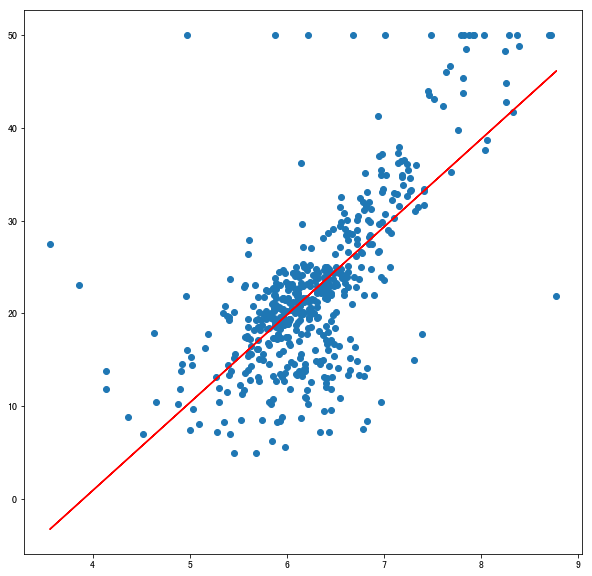

In [7]:
best_y_hat = X_rm * best_theta_1 + best_theta_0
plt.figure(figsize=(10,10))
plt.scatter(X_rm, Y)
plt.plot(X_rm, best_y_hat, color='red')
plt.show()

## 3.Gradient descent with square loss function

In [8]:
learning_rate = random.random() / 10000
learning_rate

4.8101522206002425e-05

In [9]:
# %%time
theta_1 = random.random() * 200 - 100
theta_0 = random.random() * 200 - 100
min_loss = float('inf')
update_count = 0
flag = 1

while flag:
    update_count += 1
    y_hat = X_rm * theta_1 + theta_0
    current_loss = np.sum(np.square(Y - y_hat)) / len(Y)
    if min_loss > current_loss:
        difference = min_loss - current_loss
#         if update_count % 5000 == 0:
#             print(f"{update_count} iteration: with loss {min_loss} : theta_1 = {theta_1}, theta_0 = {theta_0}")            
        min_loss = current_loss    
        
    theta_1 = theta_1 - learning_rate * 2 * np.sum((y_hat - Y) * X_rm) / len(Y)
    theta_0 = theta_0 - learning_rate * 2 * np.sum(y_hat - Y) / len(Y)
    
    if difference <= 0.0001:
        flag = 0
print(f"{update_count} iterations to get best theta with {min_loss} and {current_loss}")
print(theta_1, theta_0)

645620 iterations to get best theta with 86.82657792733568 and 86.82657792733568
-0.20939832281491996 24.560976032270283


-0.20939832281491996 24.560976032270283


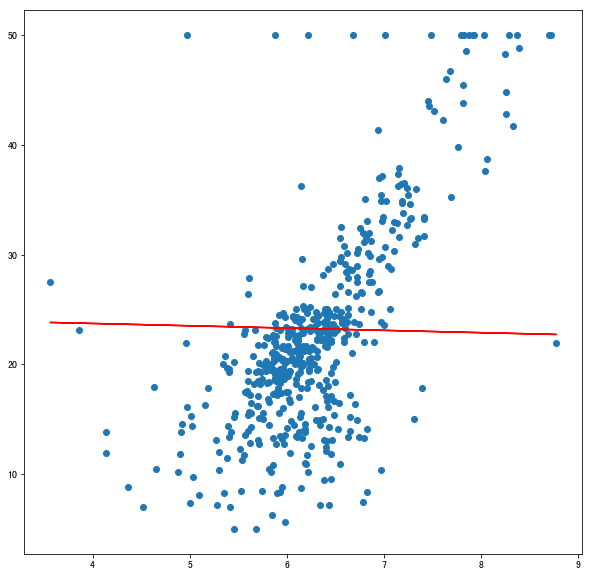

In [10]:
best_y_hat = X_rm * theta_1 + theta_0
print(theta_1, theta_0)
plt.figure(figsize=(10,10))
plt.scatter(X_rm, Y)
plt.plot(X_rm, best_y_hat, color='red')
plt.show()

### 初始化几个问题：
* theta_0, theta_1的初始值选择
* 学习速率的选择
* 线性方程函数，。。。其他函数方程
* 代价函数的选择

## 4.Gradient descent with abs loss function

In [11]:
# %%time
learning_rate = random.random() / 10000
theta_1 = random.random() * 200 - 100
theta_0 = random.random() * 200 - 100
min_loss = float('inf')
update_count = 0
flag = 1

while flag:
    update_count += 1
    y_hat = X_rm * theta_1 + theta_0
    current_loss = np.sum(np.abs(Y - y_hat)) / len(Y)
    
    if min_loss > current_loss:
        difference = min_loss - current_loss
        if update_count % 5000 == 0:
            print(f"{update_count} iteration: with loss {min_loss} : theta_1 = {theta_1}, theta_0 = {theta_0}")            
        min_loss = current_loss    
        
    theta_1 = theta_1 - learning_rate * np.sum(X_rm) / len(Y)
    theta_0 = theta_0 - learning_rate * np.sum(X_rm) / len(Y)
    
    if difference <= 0.0001:
        flag = 0
print(f"{update_count} iterations to get best theta with theta_1 = {theta_1} theta_0 = {theta_0}")

5000 iteration: with loss 502.3482065334554 : theta_1 = 90.04102188630847, theta_0 = -40.99660012251906
10000 iteration: with loss 488.7954010489484 : theta_1 = 88.18055713764872, theta_0 = -42.85706487114329
15000 iteration: with loss 475.2425955644414 : theta_1 = 86.32009238898897, theta_0 = -44.71752961976751
20000 iteration: with loss 461.68979007993426 : theta_1 = 84.45962764032922, theta_0 = -46.577994368391735
25000 iteration: with loss 448.1369845954272 : theta_1 = 82.59916289166947, theta_0 = -48.43845911701596
30000 iteration: with loss 434.5841791109201 : theta_1 = 80.73869814300971, theta_0 = -50.298923865640184
35000 iteration: with loss 421.031373626413 : theta_1 = 78.87823339434996, theta_0 = -52.15938861426441
40000 iteration: with loss 407.47856814190595 : theta_1 = 77.01776864569021, theta_0 = -54.01985336288863
45000 iteration: with loss 393.9257626573988 : theta_1 = 75.15730389703046, theta_0 = -55.88031811151286
50000 iteration: with loss 380.37295717289174 : theta

20.972756464830482 -110.06486554427414


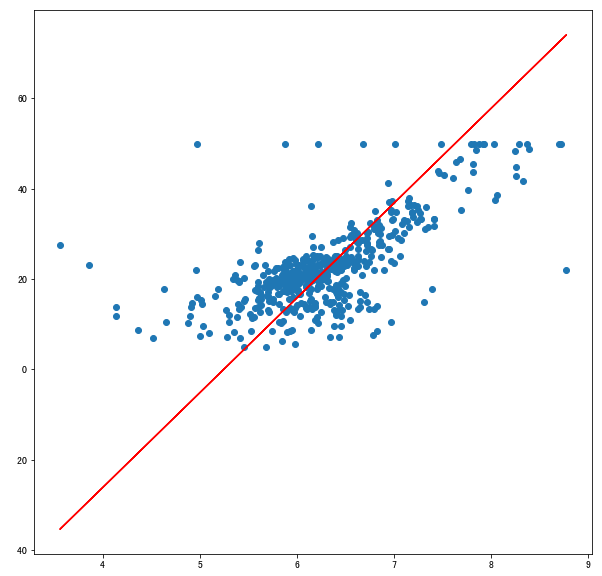

In [12]:
best_y_hat = X_rm * theta_1 + theta_0
print(theta_1, theta_0)
plt.figure(figsize=(10,10))
plt.scatter(X_rm, Y)
plt.plot(X_rm, best_y_hat, color='red')
plt.show()

## 5.Dynamic Programming
* Overlapping subproblems
* Overlapping computing saved in a table
* Parse solution

> 重新解决w2的地铁路径搜索问题

In [13]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [14]:
from collections import defaultdict
from functools import lru_cache
price = defaultdict(int)
for i, p in enumerate(original_price):
    price[i + 1] = p
price[11]

35

In [24]:
call_time_with_args = defaultdict(int)
solution = {}
@get_call_count(call_time_with_args)
@memo
@lru_cache(maxsize=128)
def get_max_price(n):
    """
    Return optimun of the combination.
    """

    max_price, max_split = max(
        [(price[n], 0)] + [(get_max_price(i) + get_max_price(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )
    solution[n] = (n - max_split, max_split)
    return max_price

# Best substructure
def parse_solution(n):
    left_split, right_split = solution[n]
    if not right_split: return [left_split]
    return parse_solution(left_split) + parse_solution(right_split)

In [25]:
get_max_price(235)

745

In [26]:
parse_solution(234)

[11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 3]

In [ ]:
call_time_with_args

In [ ]:
from collections import Counter
Counter(call_count_with_args).most_common()

### Decorator

In [16]:
from functools import wraps
def get_call_count(call_count_dict):
    def get_function_call_count(f):
        @wraps(f)
        def wrap(*args):
            """
            This is wrap.
            """
            result = f(*args)
            call_count_dict[(f.__name__, args)] += 1
            return result
        return wrap
    return get_function_call_count

In [ ]:
call_count_add = defaultdict(int)
@get_call_count(call_count_add)
def add_ten(n):
    return n + 10

In [ ]:
add_ten(13)

In [ ]:
call_count_add

In [23]:
def memo(f):
    cache = {}
    @wraps(f)
    def _wrap(*args):
        result = None
        if args in cache:
            result = cache[args]
        else:
            result = f(*args)
            cache[args] = result
        return result
    return _wrap